# Importing Standard Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing data

In [2]:
df = pd.read_csv(r"C:\Users\Lakshmi Deepak\Google Drive\01 - Career\01 - Work\01 - Fundamentals\11 - Drug Reviews\test_data.csv")
test = pd.read_csv(r"C:\Users\Lakshmi Deepak\Google Drive\01 - Career\01 - Work\01 - Fundamentals\11 - Drug Reviews\test_data.csv")

In [3]:
print("Shape of training dataset:", df.shape)
df.head()

Shape of training dataset: (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
print("Shape of testing dataset:", test.shape)
test.head()

Shape of testing dataset: (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [5]:
# From the above two ouputs we can see that both the dataset contains same columns, we can combine them for better analysis

data = pd.concat([df, test])
print("Shape of dataset after combining both train & test:", data.shape)
data.head()

Shape of dataset after combining both train & test: (107532, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


# Exploratory Data Analysis

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,107532.0,116386.701187,67017.428260,0.0,58272.0,116248.5,174588.0,232284.0
rating,107532.0,6.976900,3.285192,1.0,4.0,8.0,10.0,10.0
usefulCount,107532.0,27.989752,36.172665,0.0,6.0,16.0,36.0,949.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107532 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     107532 non-null  int64 
 1   drugName     107532 non-null  object
 2   condition    106942 non-null  object
 3   review       107532 non-null  object
 4   rating       107532 non-null  int64 
 5   date         107532 non-null  object
 6   usefulCount  107532 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.6+ MB


In [8]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

#### NaNs ?

In [9]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

We notice that we have some NaNs in "condition" column.

In [10]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      590
review           0
rating           0
date             0
usefulCount      0
dtype: int64

We have 1194 NaNs in "condition" column.

#### Word cloud for Drug Names

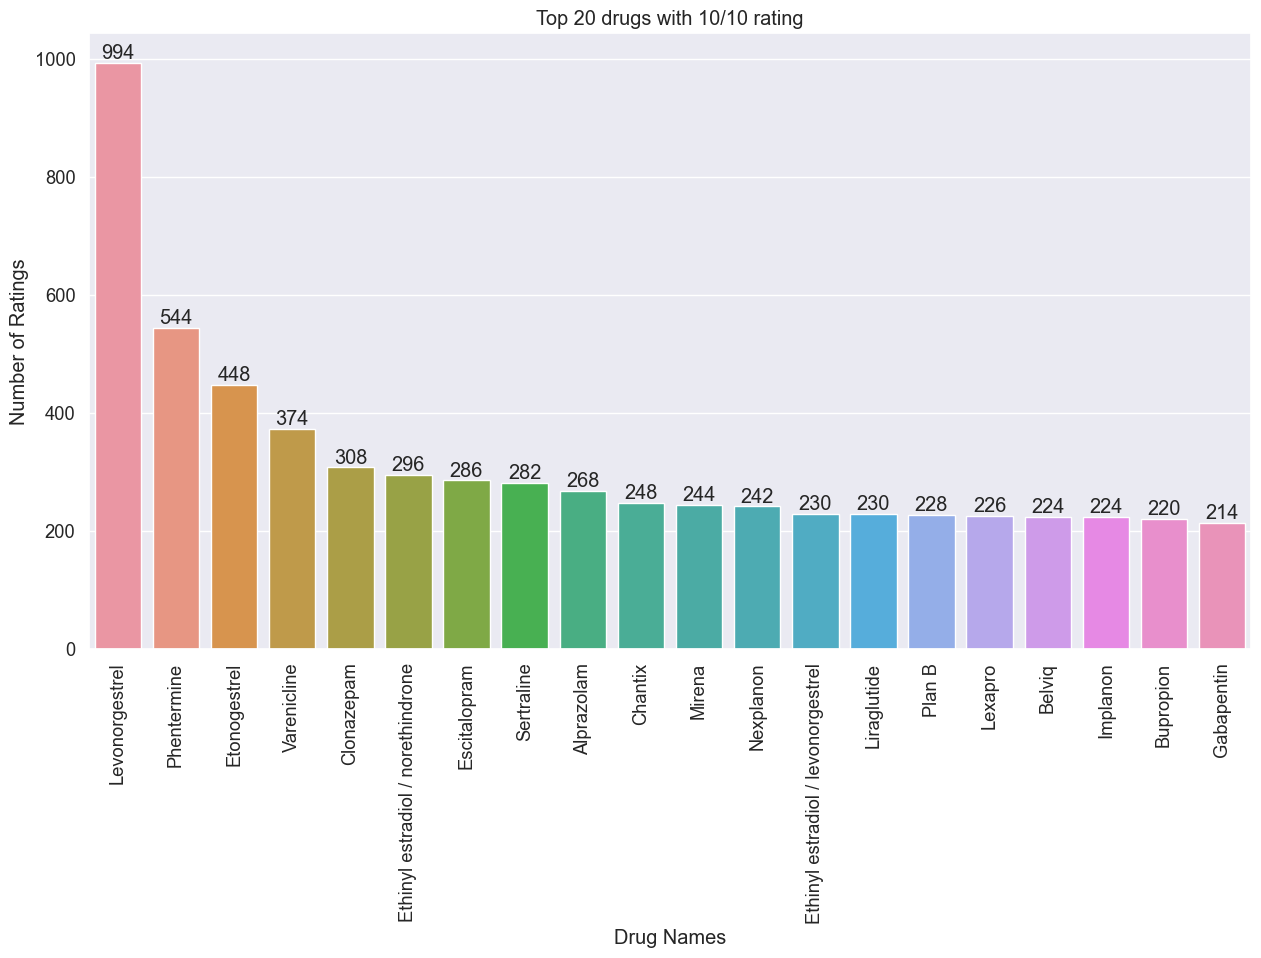

In [11]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

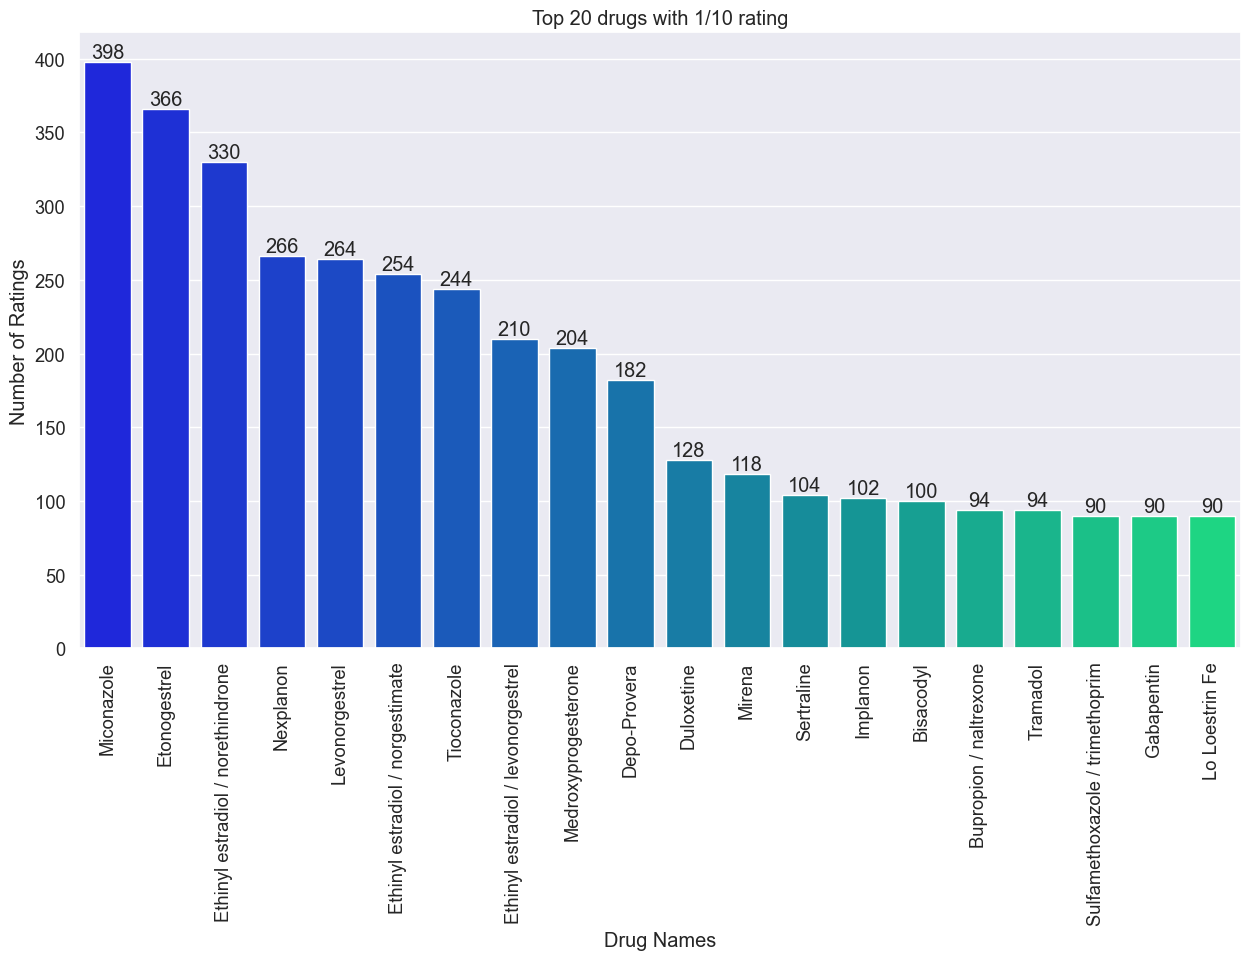

In [12]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

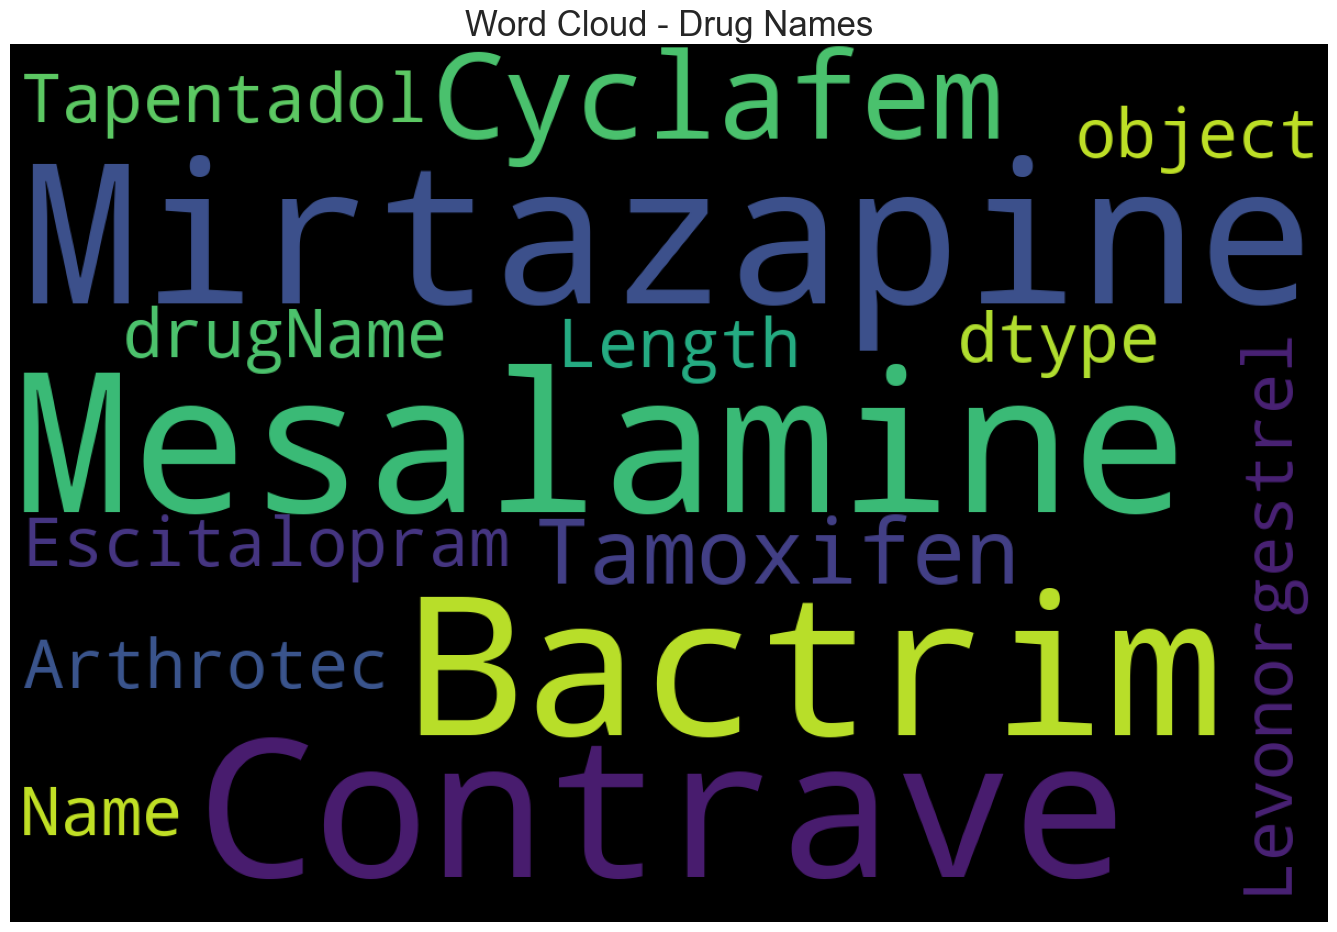

In [13]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

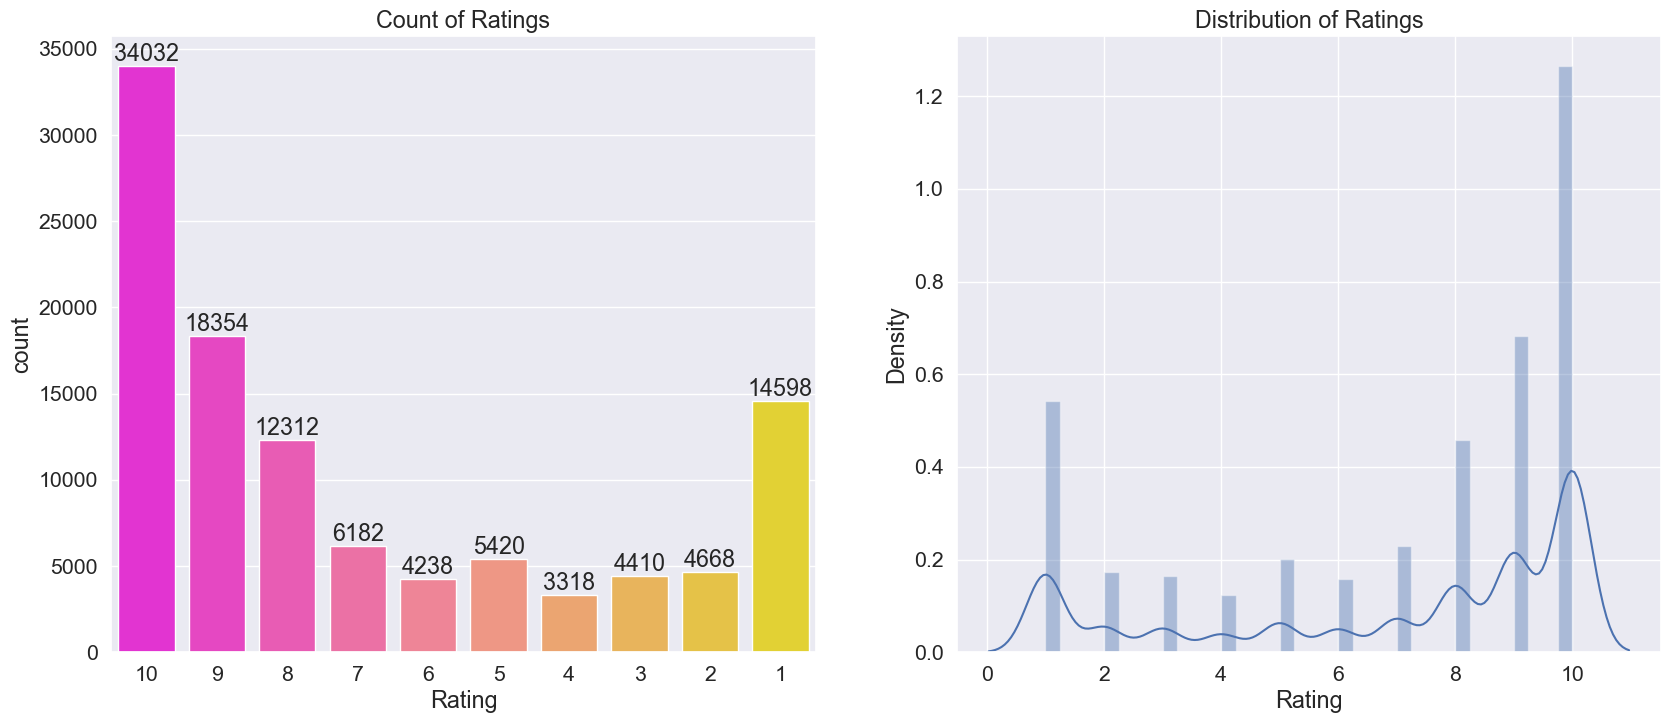

In [14]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")
plt.show()

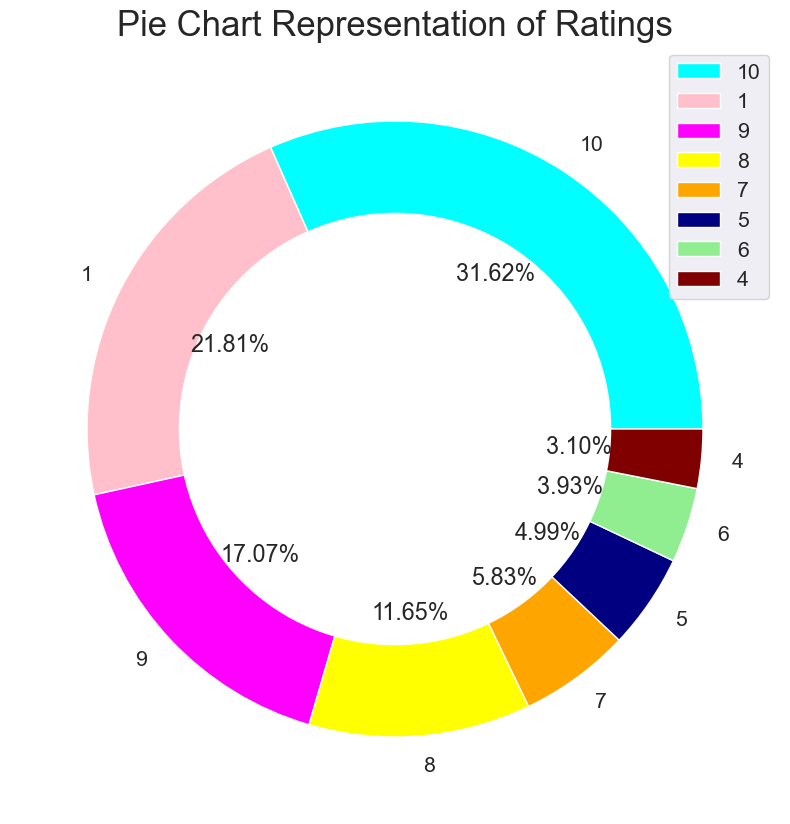

In [15]:
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['cyan', 'pink', 'magenta',  'yellow', 'orange', 'navy', 'lightgreen', 'maroon']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

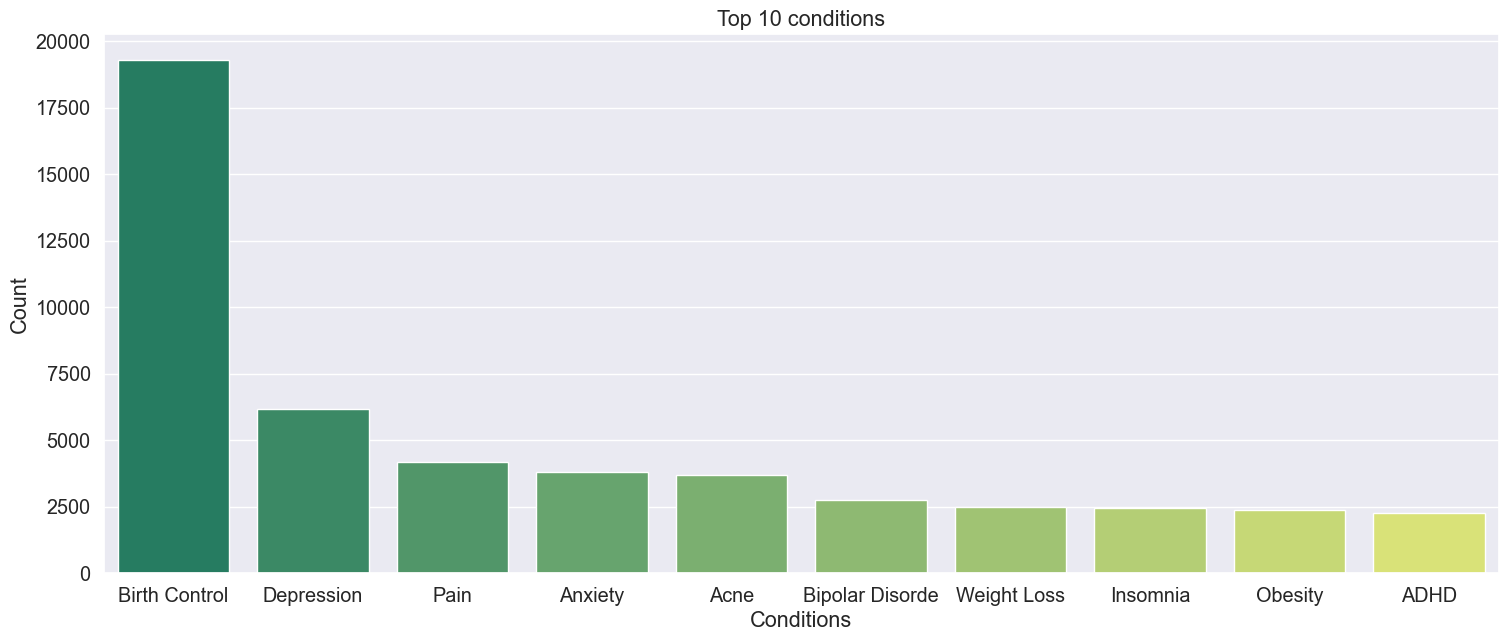

In [16]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'summer')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")

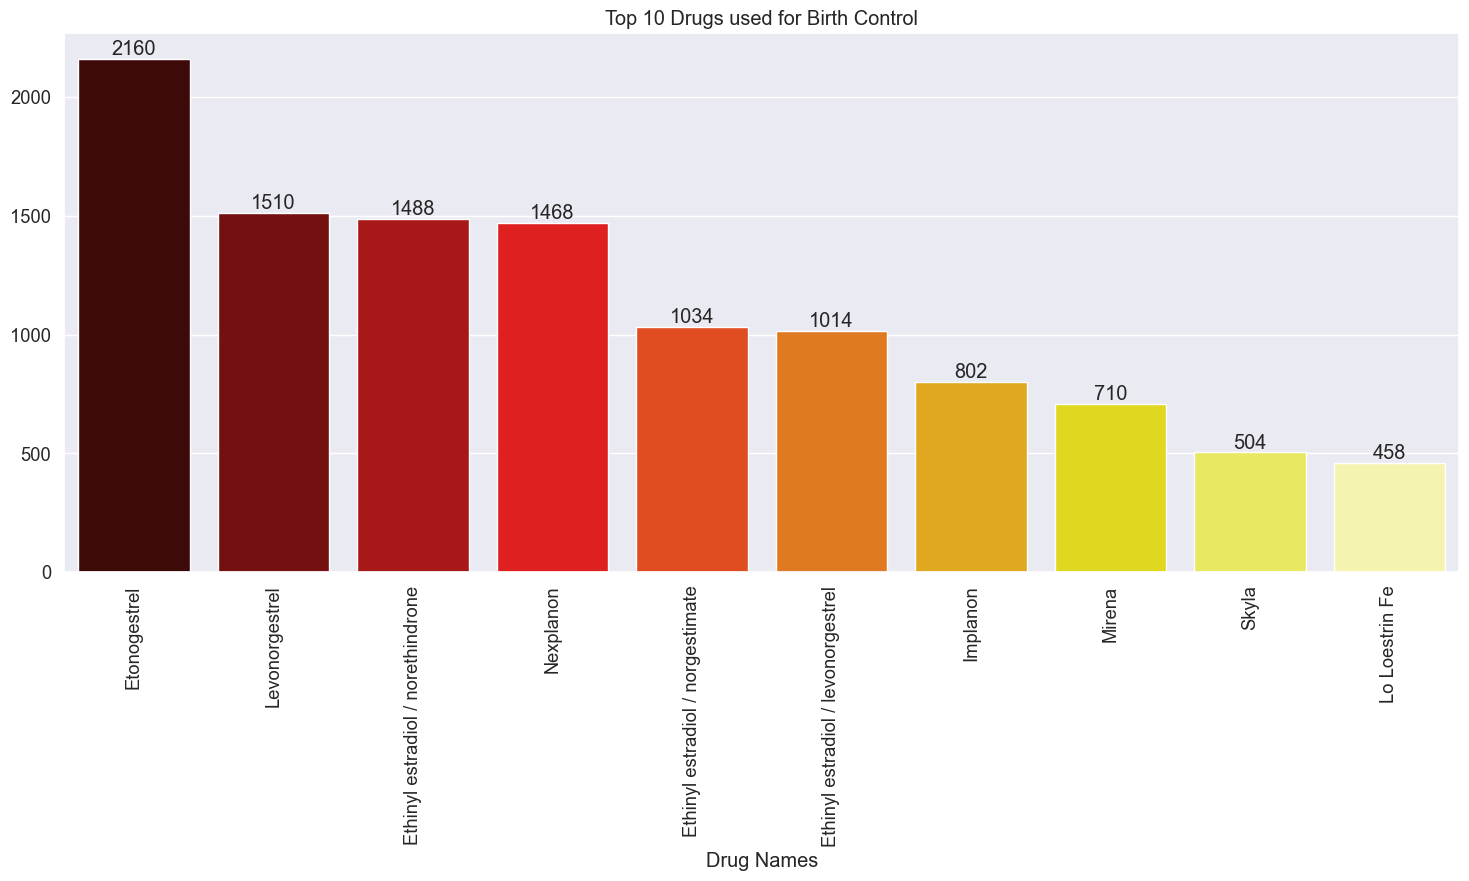

In [17]:
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'hot')

for i in sns_.containers:
    sns_.bar_label(i,)
    
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.show()

In [18]:
# feature engineering 
# let's make a new column named "review sentiment"

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    80538
0.0    26994
Name: Review_Sentiment, dtype: int64

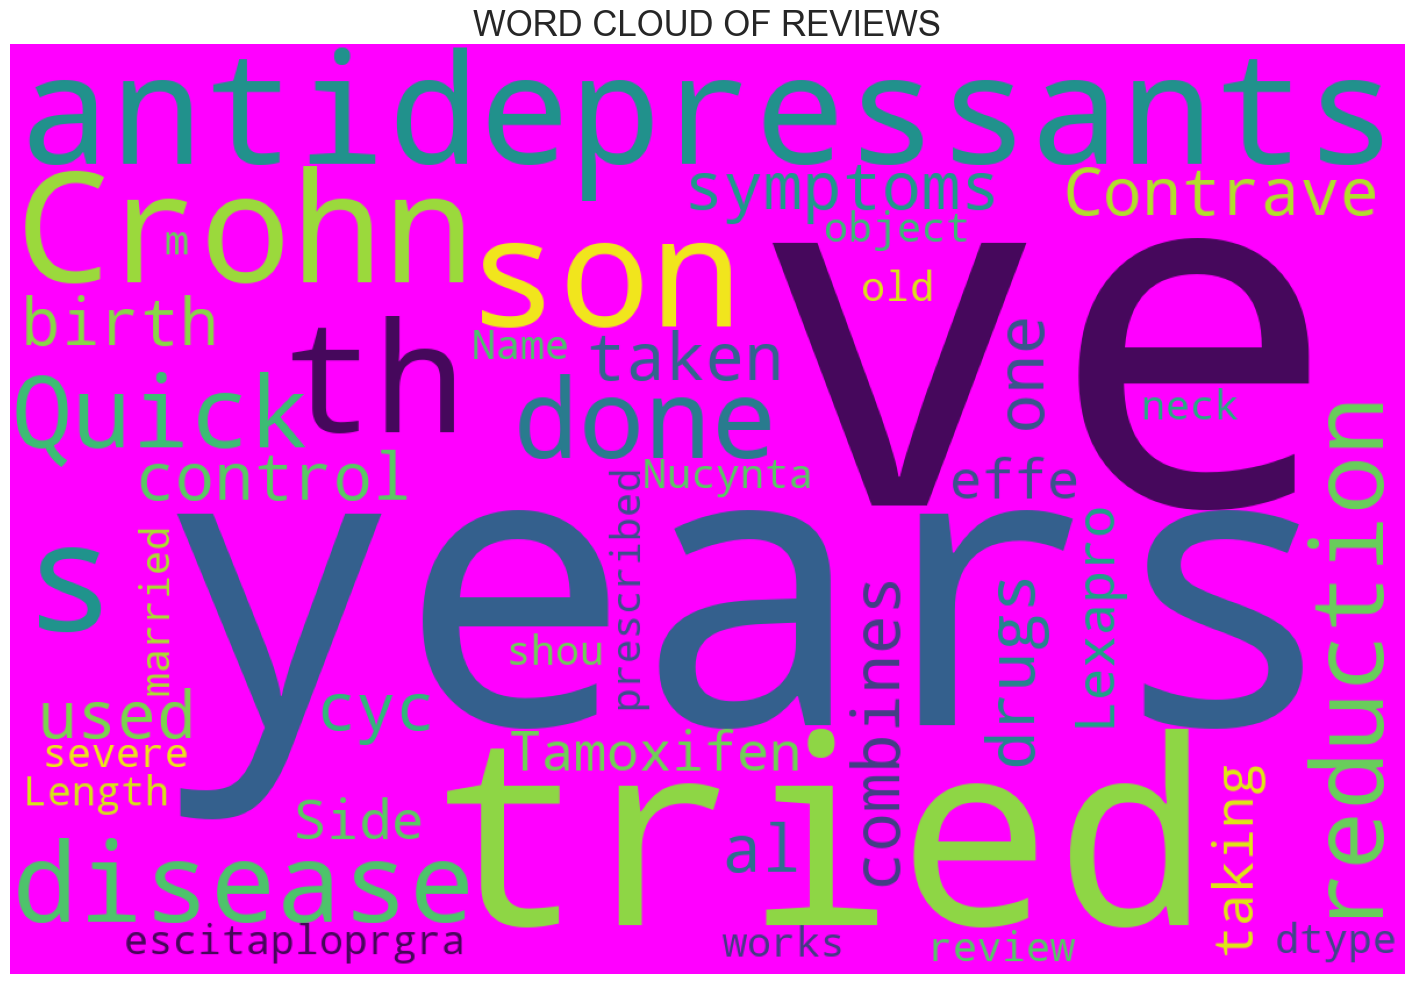

In [19]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (18, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

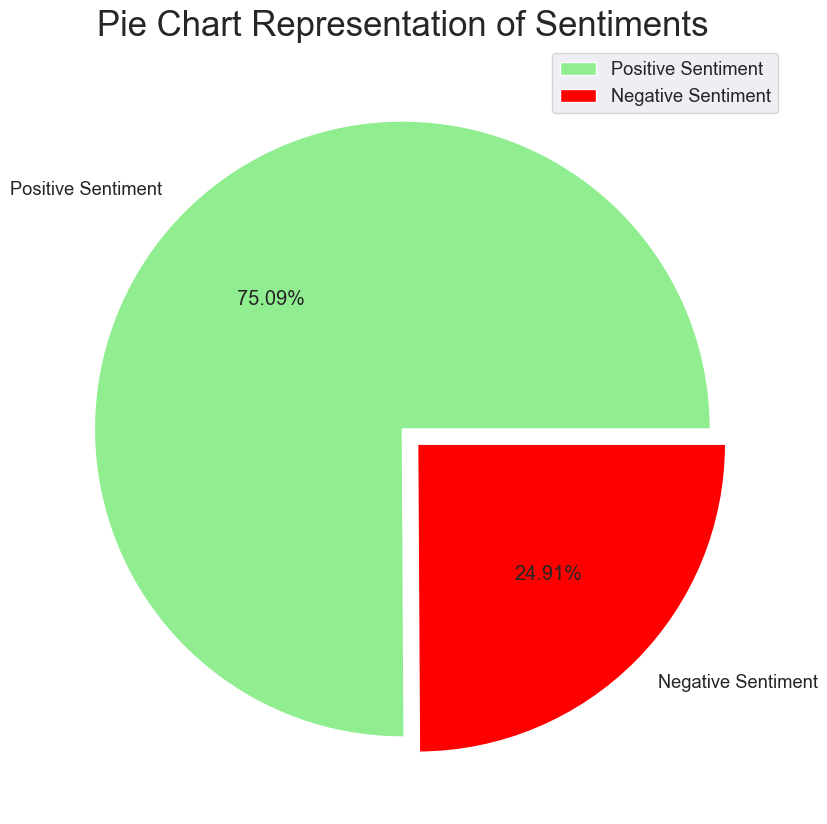

In [20]:
size = [161491, 53572]
colors = ['lightgreen', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.07]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [21]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment'],
      dtype='object')

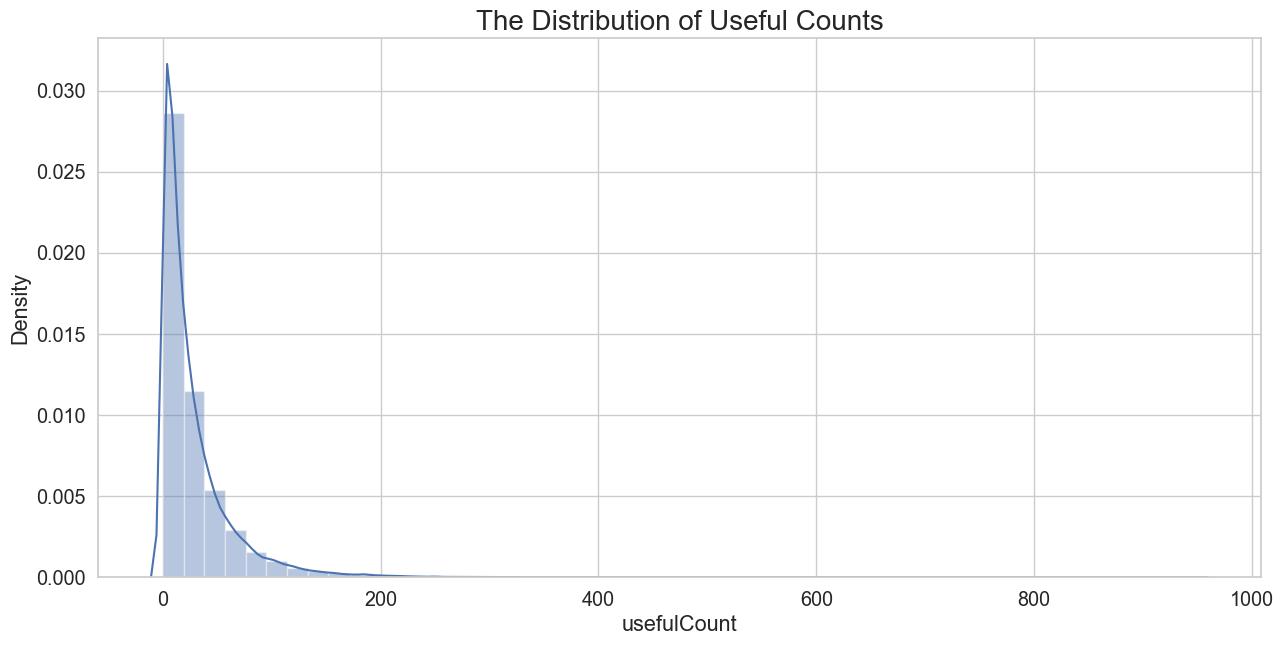

In [22]:
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [15, 7]
sns.distplot(data['usefulCount'].dropna())
plt.title('The Distribution of Useful Counts', fontsize = 20)
plt.show()

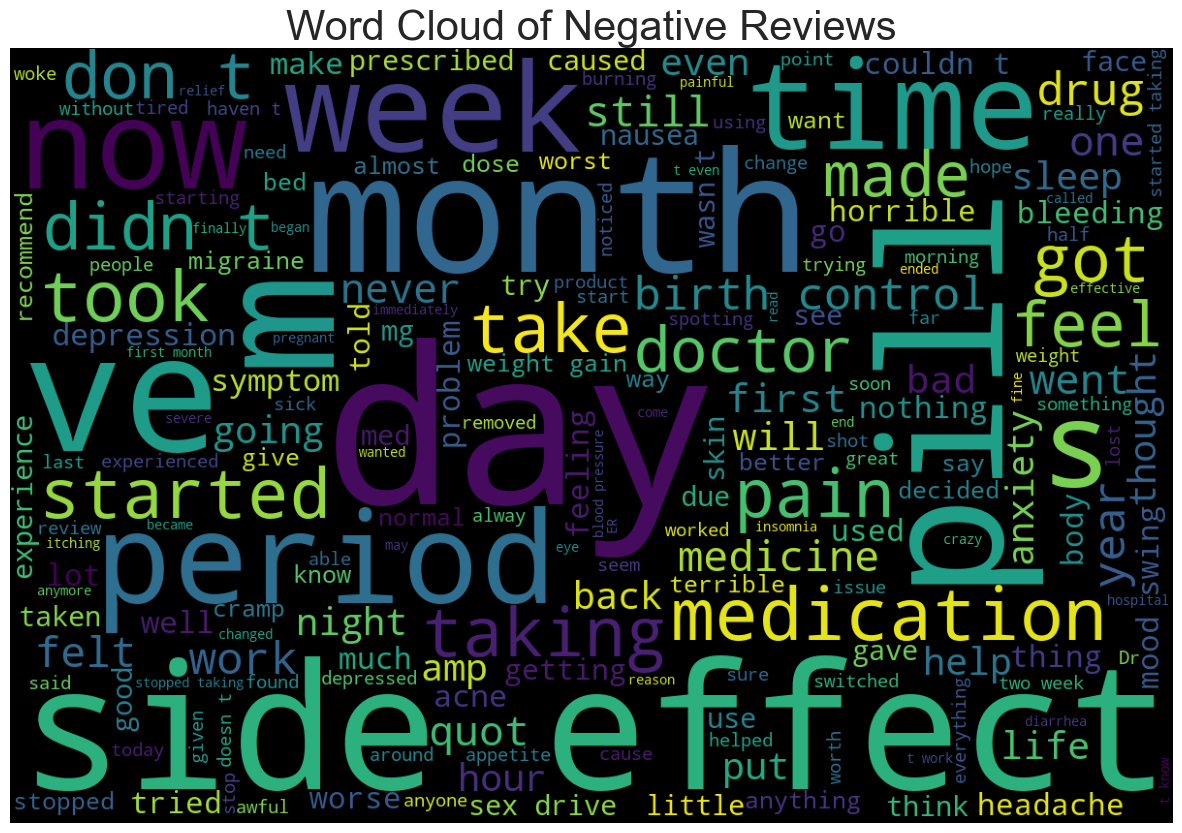

In [23]:
negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

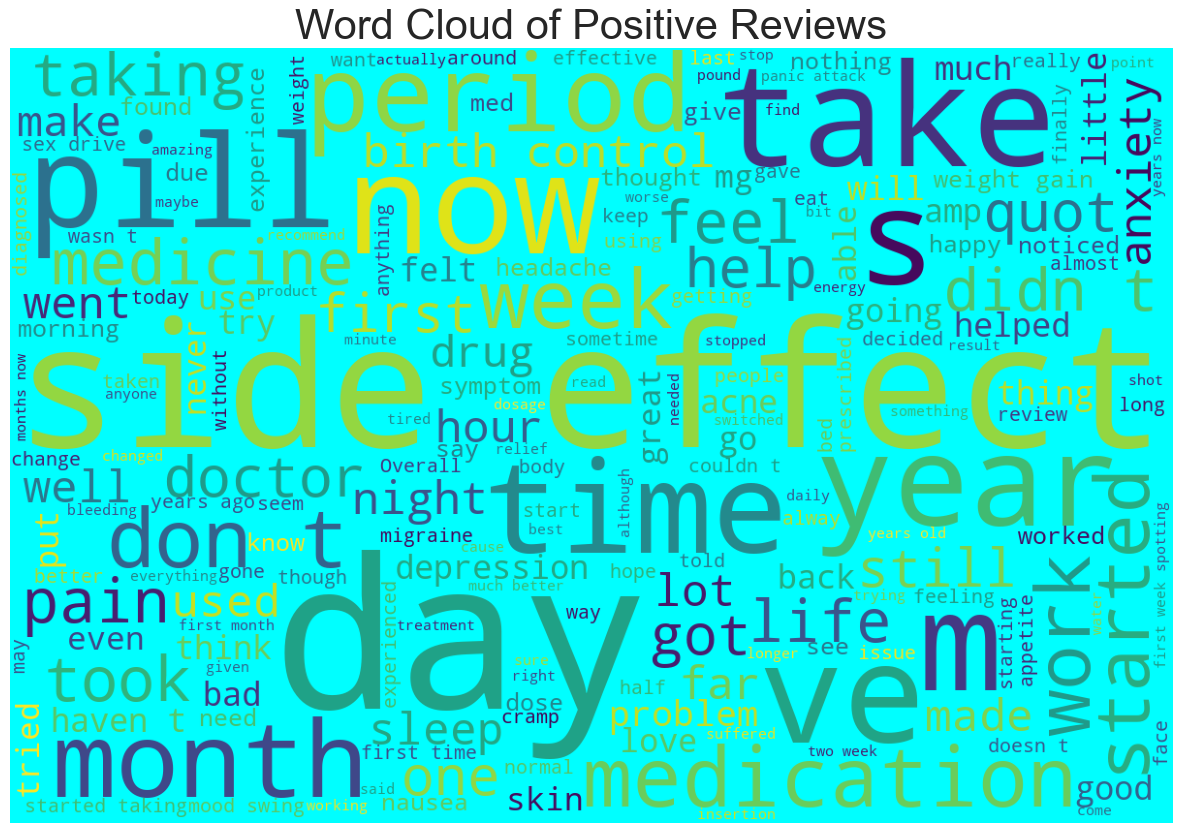

In [24]:
positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Transforming date column

In [25]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

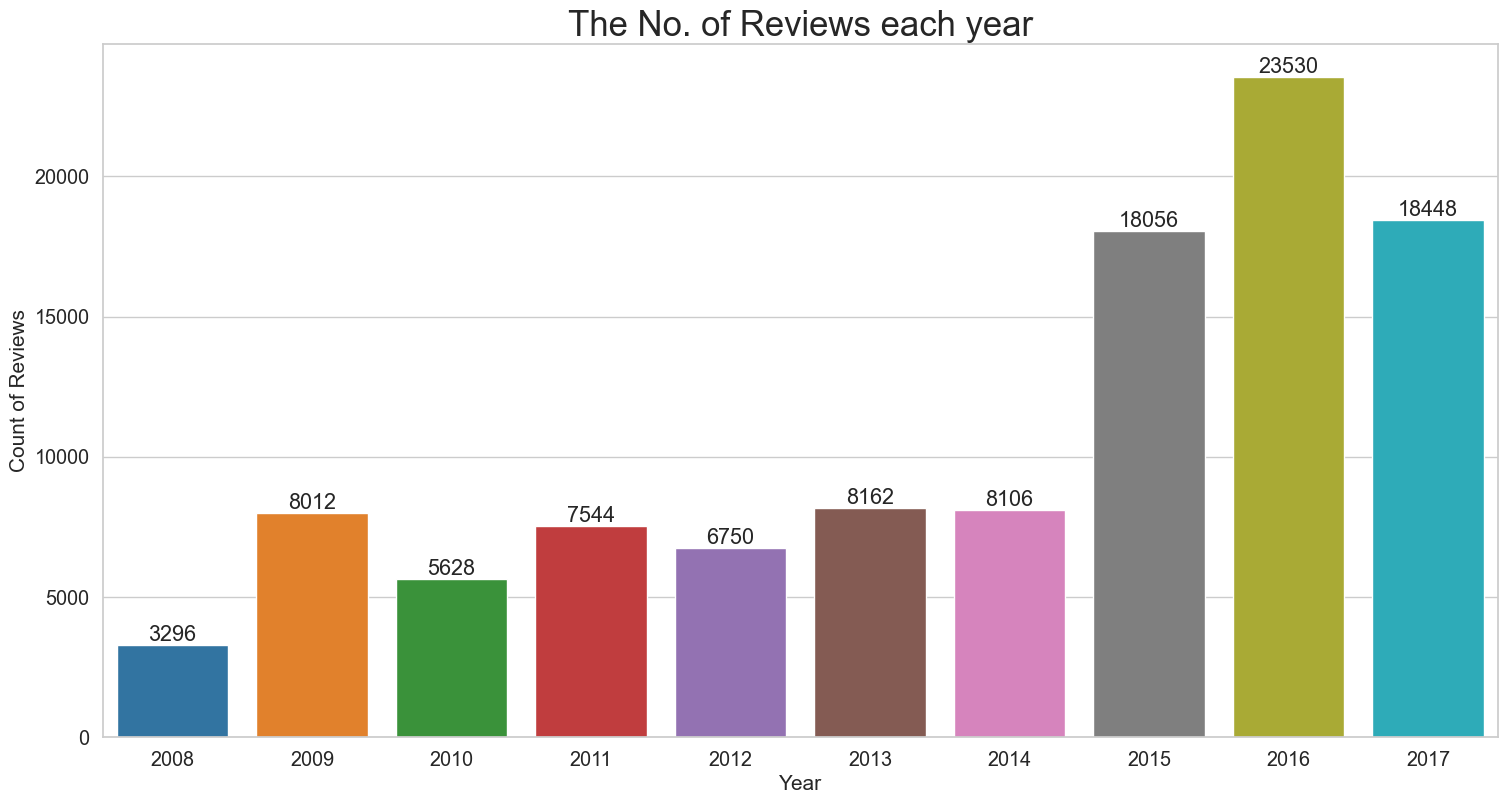

In [26]:
plt.rcParams['figure.figsize'] = (18, 9)
sns_=sns.countplot(data['Year'], palette ='tab10')

for i in sns_.containers:
    sns_.bar_label(i,)
    
plt.title('The No. of Reviews each year', fontsize = 25)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

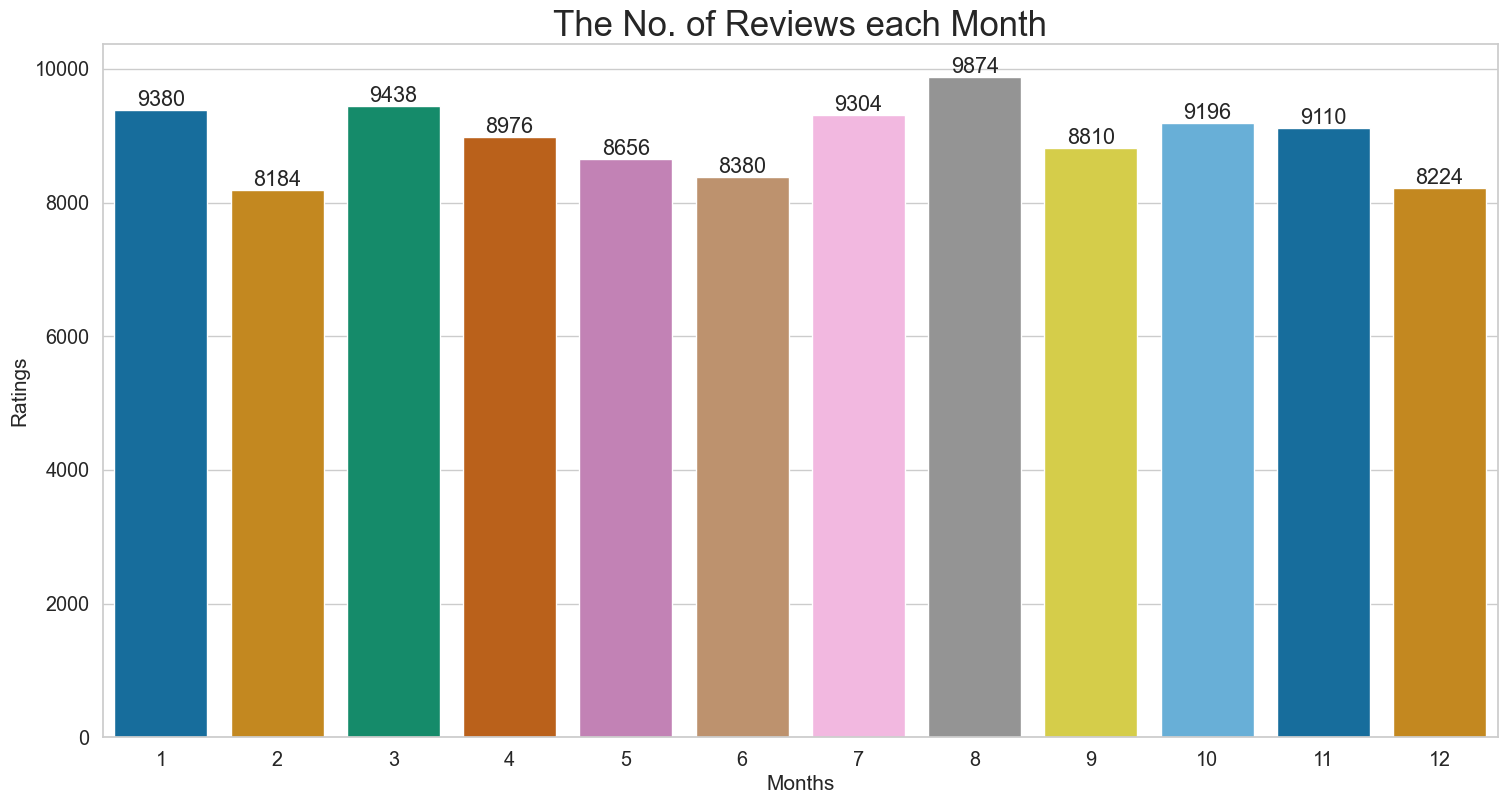

In [27]:
plt.rcParams['figure.figsize'] = (18, 9)
sns_=sns.countplot(data['month'], palette ='colorblind')

for i in sns_.containers:
    sns_.bar_label(i,)

plt.title('The No. of Reviews each Month', fontsize = 25)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

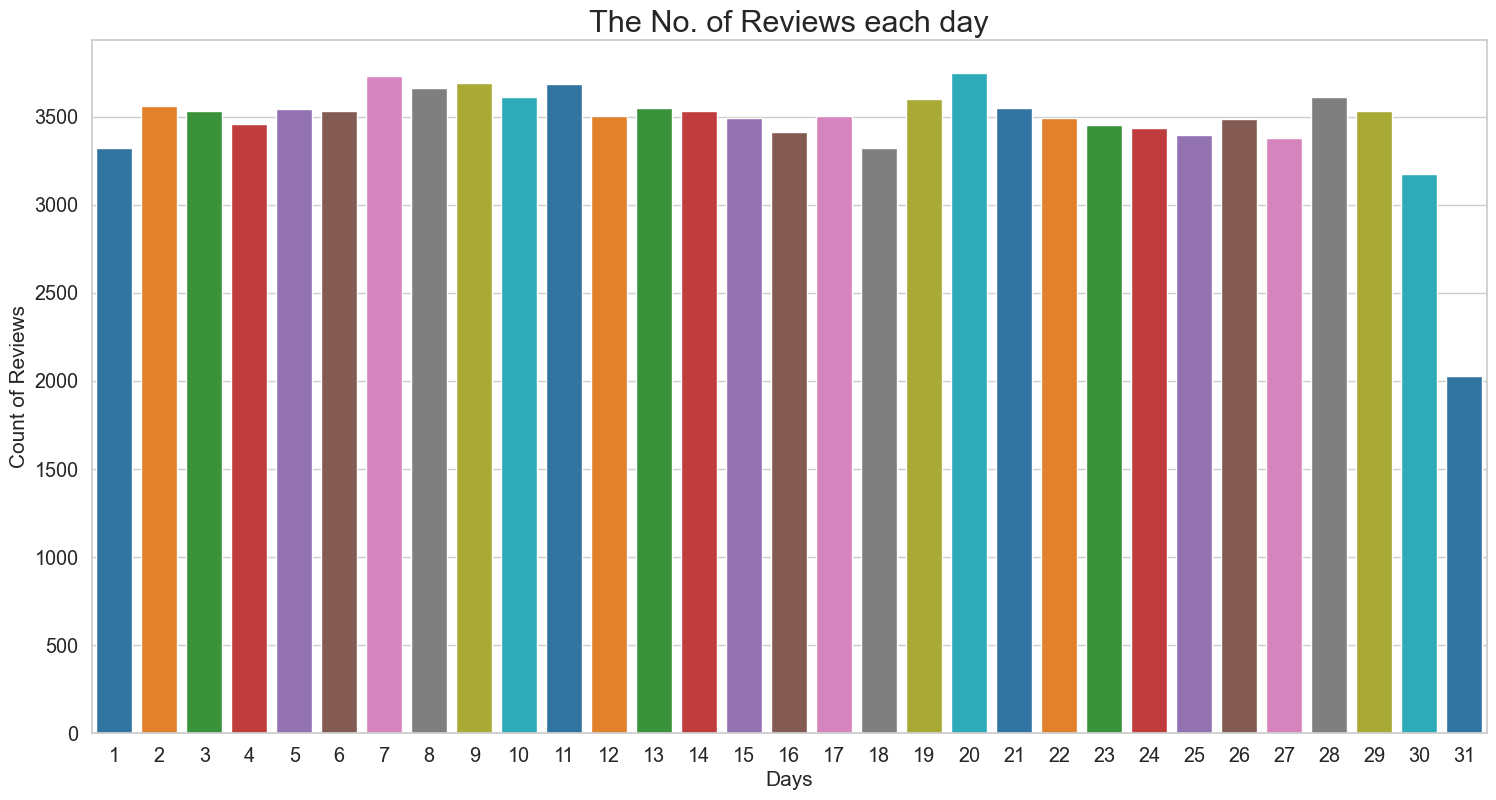

In [28]:
plt.rcParams['figure.figsize'] = (18, 9)
sns_=sns.countplot(data['day'], palette ='tab10')

plt.title('The No. of Reviews each day', fontsize = 22)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

# Feature Engineering

In [29]:
# changing to lower case
lower = data.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
data['review_clean'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [33]:
!pip install textblob
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
nltk.download('stopwords')
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to C:\Users\Lakshmi
[nltk_data]     Deepak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [34]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,1.0,2009,5,17,son crohn disea done veri well asacol complain...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduct symptom


In [35]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

data['sentiment'] = sentiment(data['review'])
data['sentiment_clean'] = sentiment(data['review_clean'])

In [36]:
# changing to lower case
lower = data.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
data['review_clean_ss'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [37]:
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [38]:
data = data.dropna(how="any", axis=0)

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Feature Selection

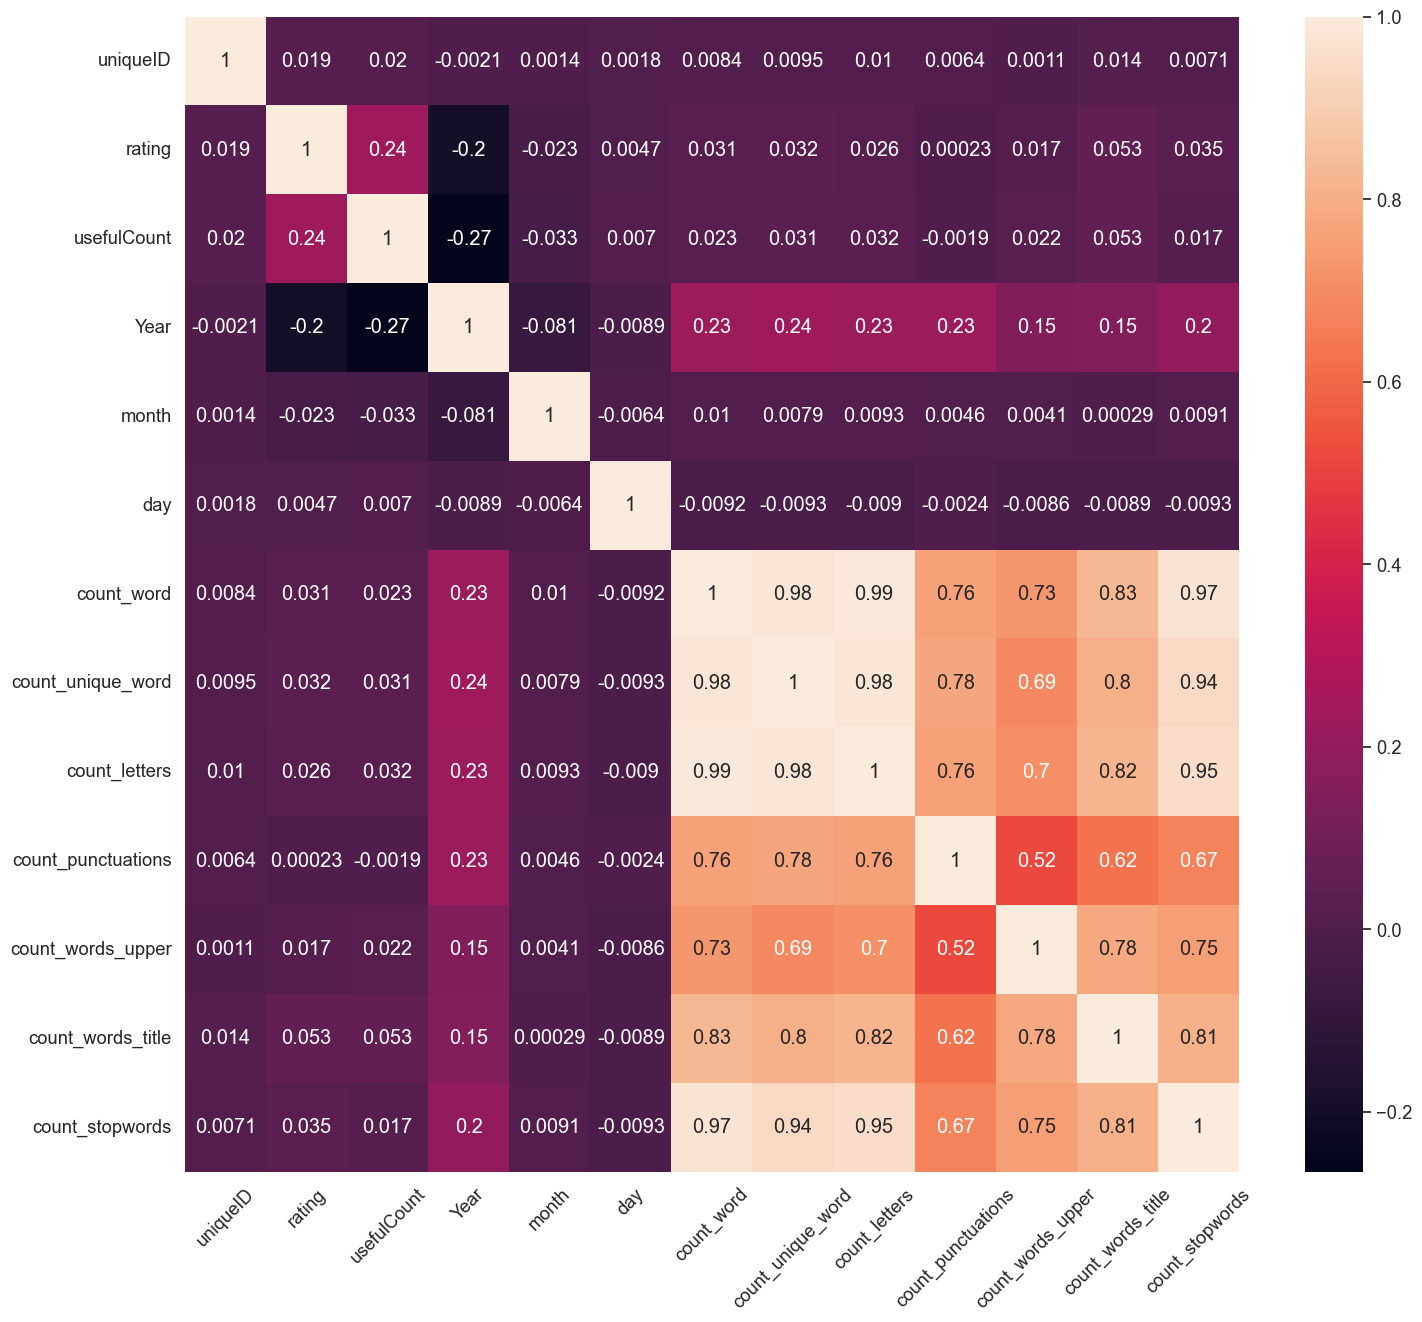

In [39]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True)
plt.setp(sns_.get_xticklabels(), rotation = 45)
plt.show()

#### Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

#### After Label Encoding

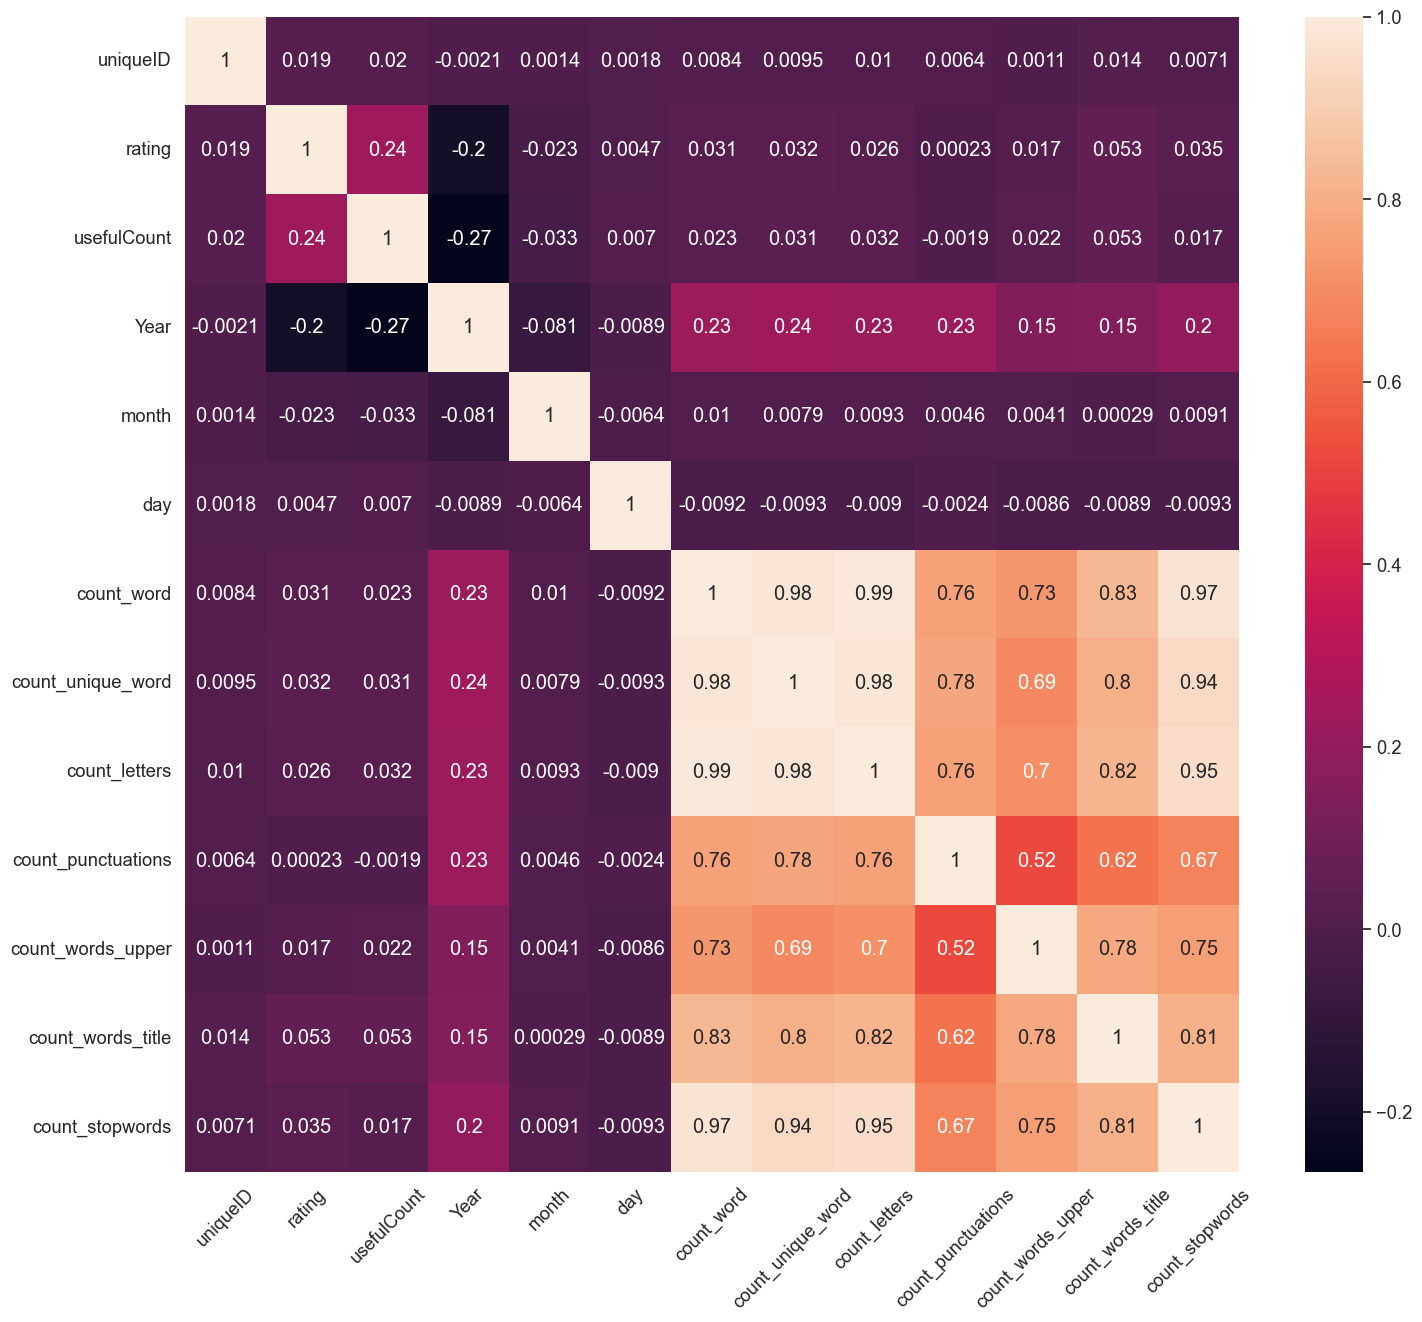

In [41]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True)
plt.setp(sns_.get_xticklabels(), rotation = 45)
plt.show()

# Model Training

In [44]:
!pip install xgboost
!pip install lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.0/1.0 MB 2.0 MB/s eta 0:00:00


In [45]:
features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (80206, 15)
The Test set size  (26736, 15)


In [46]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.9549670855774985
The confusion Matrix is 


array([[ 5901,   812],
       [  392, 19631]], dtype=int64)

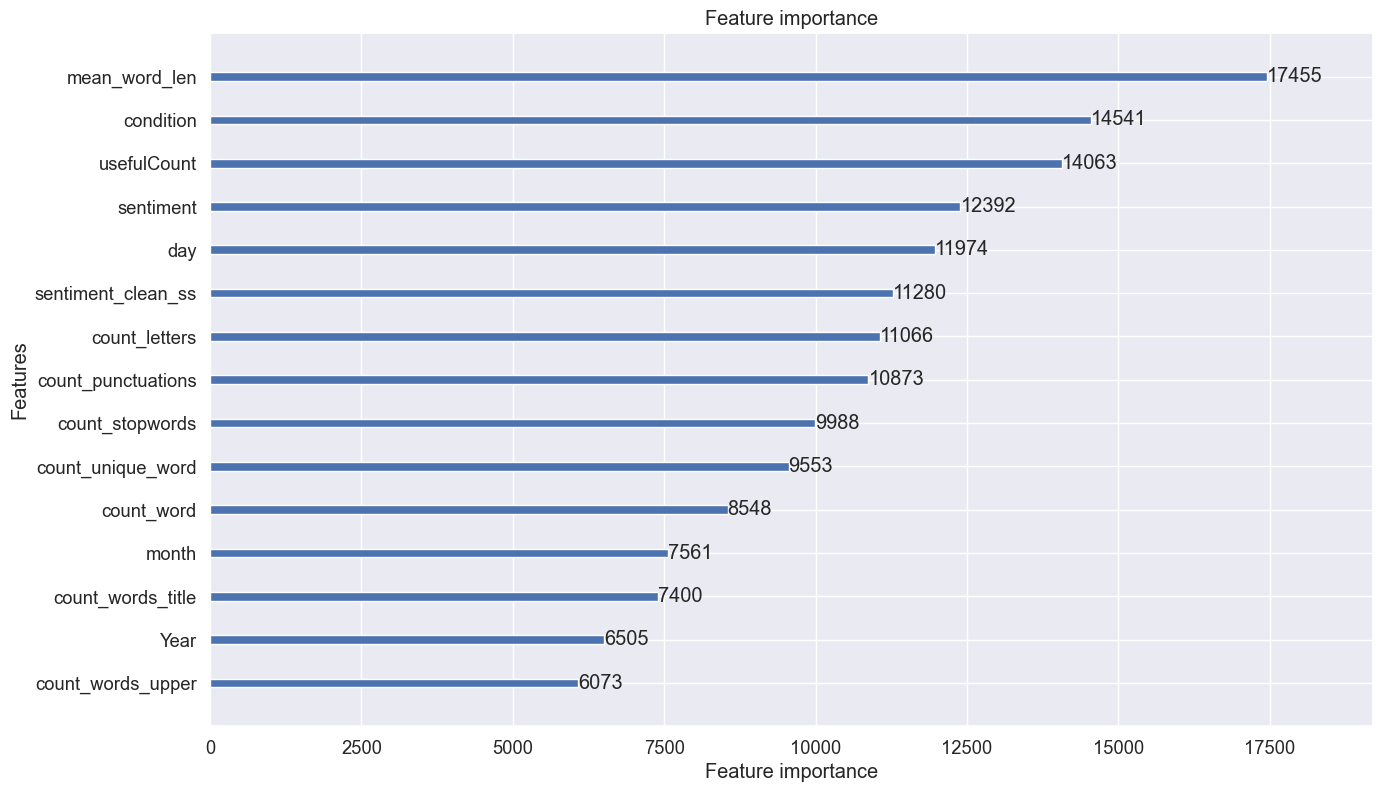

In [47]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [15, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model)
plt.show()